In [37]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("CANCER_TABLE.csv")

In [83]:
data["prediction"] = data["diameter (cm)"].apply(lambda x: True if x >= 7 else False)

In [39]:
data.columns

Index(['diameter (cm)', 'cancer', 'prediction'], dtype='object')

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = data["cancer"]  # True labels
y_pred = data["prediction"]  # Predicted labels

conf_matrix = confusion_matrix(y_true, y_pred, labels=[True, False])
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["True (Cancer)", "False (No Cancer)"])


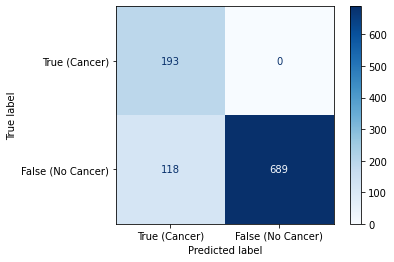

In [85]:
disp.plot(cmap="Blues")

In [86]:
TP = conf_matrix[0, 0]  # True Positive
FP = conf_matrix[1, 0]  # False Positive
FN = conf_matrix[0, 1]  # False Negative
TN = conf_matrix[1, 1]  # True Negative

# Compute metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Compute F1-score
if precision + recall > 0:
    f1_score = 2 * (precision * recall) / (precision + recall)
else:
    f1_score = 0

TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
FPR = FP / (FP + TN) if (FP + TN) > 0 else 0

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")
print(f"True Positive Rate (TPR): {TPR:.2f}")
print(f"False Positive Rate (FPR): {FPR:.2f}")

Accuracy: 0.88
Precision: 0.62
Recall: 1.00
Accuracy: 0.88
Precision: 0.62
Recall: 1.00
F1-score: 0.77
True Positive Rate (TPR): 1.00
False Positive Rate (FPR): 0.15


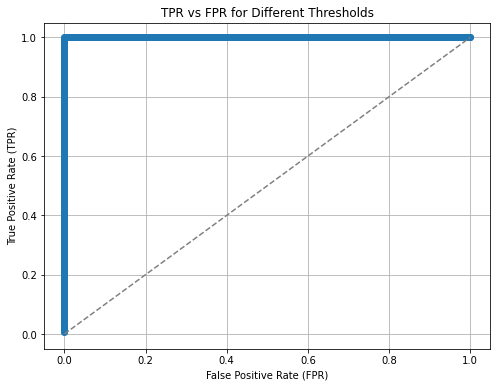

In [89]:
import matplotlib.pyplot as plt

tpr_list = []
fpr_list = []
thresholds = sorted(data["diameter (cm)"].unique())
# Iterate over each threshold
for threshold in thresholds:
    # Predict positive if diameter >= threshold, else negative
    data["prediction"] = data["diameter (cm)"].apply(lambda x: True if x >= threshold else False)
    
    # Compute confusion matrix
    y_true = data["cancer"].astype(bool)
    y_pred = data["prediction"]
    
    # Get the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred, labels=[True, False])
    
    # Extract TP, FP, FN, TN
    TP = conf_matrix[0, 0]  # True Positive
    FP = conf_matrix[1, 0]  # False Positive
    FN = conf_matrix[0, 1]  # False Negative
    TN = conf_matrix[1, 1]  # True Negative
    
    # Compute TPR (True Positive Rate) and FPR (False Positive Rate)
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)

    # Store the results
    tpr_list.append(TPR)
    fpr_list.append(FPR)

# Plot TPR vs. FPR (ROC curve)
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, marker='o', label="TPR vs FPR (Thresholds)")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("TPR vs FPR for Different Thresholds")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.grid(True)
plt.show()

###

### Linear regression classifier

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = data[['diameter (cm)']]
y = data['cancer']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.995
Classification Report:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00       162
        True       1.00      0.97      0.99        38

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



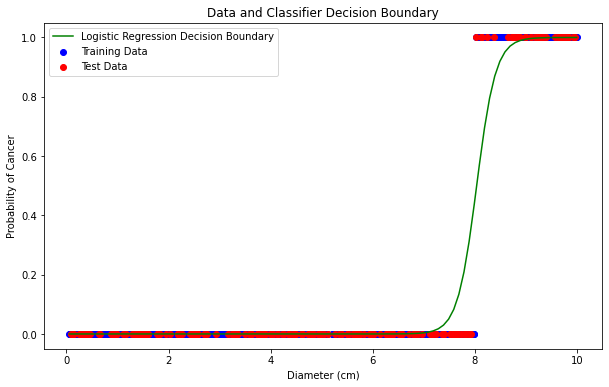

In [125]:
import numpy as np

x_values = np.linspace(X['diameter (cm)'].min(), X['diameter (cm)'].max(), 100).reshape(-1, 1)
y_values = classifier.predict_proba(x_values)[:, 1]  # Probability of class 1

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')

# Plot the decision boundary
plt.plot(x_values, y_values, color='green', label='Logistic Regression Decision Boundary')

# Add labels and legend
plt.xlabel('Diameter (cm)')
plt.ylabel('Probability of Cancer')
plt.title('Data and Classifier Decision Boundary')
plt.legend()
plt.show()

### Compute ROC on the new model

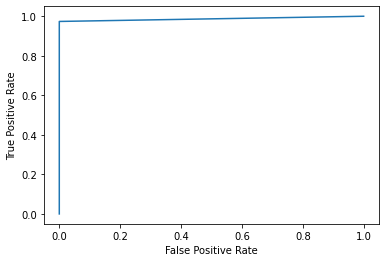

In [115]:
from sklearn.metrics import RocCurveDisplay, roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

#### Make final predictions using a threshold over the calssifier results

In [134]:
prediction = classifier.predict(X)

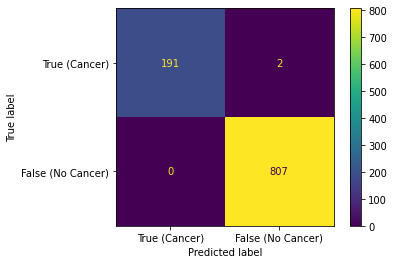

In [135]:

conf_matrix = confusion_matrix(y, prediction, labels=[True, False])
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["True (Cancer)", "False (No Cancer)"]).plot()


In [136]:
TP = conf_matrix[0, 0]  # True Positive
FP = conf_matrix[1, 0]  # False Positive
FN = conf_matrix[0, 1]  # False Negative
TN = conf_matrix[1, 1]  # True Negative

# Compute metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Compute F1-score
if precision + recall > 0:
    f1_score = 2 * (precision * recall) / (precision + recall)
else:
    f1_score = 0

TPR = TP / (TP + FN) 
FPR = FP / (FP + TN) 

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")
print(f"True Positive Rate (TPR): {TPR:.2f}")
print(f"False Positive Rate (FPR): {FPR:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 0.99
Accuracy: 1.00
Precision: 1.00
Recall: 0.99
F1-score: 0.99
True Positive Rate (TPR): 0.99
False Positive Rate (FPR): 0.00
